# SCSP5013-Advanced Analytics

### Final Project (Unsupervised Learning)
### Group 1
#### Group members
#### 1. KRISNAVENII A/P RAJAN (B19EC0012)                      
#### 2. SITI HAMIDAH BINTI MOHD AZWAN TAN  (B19EC0038)
#### 3. TAN FEI ZHI (B19EC0041)
#### 4. NUR ARIF IKHWAN BIN ABDUL HALIM  (B19EC0031)

### Unsupervised Learning

#### Dataset used: Country-Data
#### Method used: Principal component analysis(PCA)
#### Data source: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data 

### Problem Statement of Project 1(Unsupervised Learning)

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, this project is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. 

### Purpose of Analysis

The main purpose of this study is to analyse and identify global socio-economy. In this study, the analysis will be made based on the health, income and others variables to understand the current situation of each country. The result of this research may help to enhance the soio-economic of global and help the countries encountered financial difficulties to get some essential support.

### Variables Glossary of Dataset

**country** : Name of the country <br>
**child_mort**: Death of children under 5 years of age per 1000 live births<br>
**exports**: Exports of goods and services per capita. Given as %age of the GDP per capita<br>
**health**: Total health spending per capita. Given as %age of GDP per capita<br>
**imports**: Imports of goods and services per capita. Given as %age of the GDP per capita<br>
**Income**: Net income per person<br>
**Inflation**: The measurement of the annual growth rate of the Total GDP<br>
**life_expec**: The average number of years a new born child would live if the current mortality patterns are to remain the same<br>
**total_fer**: The number of children that would be born to each woman if the current age-fertility rates remain the same.<br>
**gdpp**: The GDP per capita. Calculated as the Total GDP divided by the total population.<br>

### Topic Walkthrough

#### Topic 1: Import Data
#### Topic 2: Pre-Analytics Data
#### Topic 3: Data Exploration and Visualization
#### Topic 4: Feature Selection(Filtering method-ANOVA technique) and Scaling(StandardScale technique) 
#### Topic 5: Unsupervised Learning (PCA method)
#### Topic 6: Optimization (Gradient Descent)
#### Topic 7: Conclusion

## Topic 1: Import data

In topic 1, we will import libraries and read data from local.
The dataset will be used in this project is country-data set with total of 167 rows and 10 columns(attributes).

#### Import Libraries

In [127]:
import pandas as pd
import numpy as np

#### Read Data

In [128]:
path = "C:\\Users\\User\\Downloads\\Country-data.csv"

In [129]:
df = pd.read_csv(path)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Topic 2: Pre-Analytics Data

Topic 2 covers the overview and structure of dataset. In this topic, the reader will be given the illustration of the dataset like the data type and total of data. This step may help us in data cleaning step and give a overview for the reader to understand the internal part of the data.

The pre-analytics data method used in this study is Exploratory Data Analysis (EDA). EDA is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations. Before visualizing the data by using graph, the analysis of data structure is conducted to understand well on the dataset.

#### Print the number data rows and columns

In [130]:
df.shape

(167, 10)

Based on the result, there are 167 data and 10 columns(variables).

#### Print the datatype for each attributes

In [131]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

There are one object type data(country), two int type of data(income and gdpp) and others variables are float datatype.

#### Calculate some statistical data like percentile, mean and std of the numerical values of DF

This step may help reader to know about the count, mean and standard deviation.

In [132]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Print summary of DF

By printing the info of the dataset, we get to know each columns with non-null data and the datatype.

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Understand Covariance

Covariance indicates the direction of the linear relationship between variables.

In [134]:
df.cov()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1626.422713,-351.651128,-22.199943,-124.201982,-4.076360e+05,122.893627,-318.008262,51.801162,-3.570463e+05
exports,-351.651128,751.418298,-8.614534,489.350622,2.730946e+05,-31.090078,77.110598,-13.279671,2.103785e+05
health,-22.199943,-8.614534,7.545116,6.365141,6.861669e+03,-7.415093,5.146808,-0.817828,1.741797e+04
imports,-124.201982,489.350622,6.365141,586.104198,5.712872e+04,-63.208898,11.710284,-5.829066,5.125005e+04
income,-407635.982270,273094.598023,6861.669071,57128.721588,3.716439e+08,-30110.122438,104916.785517,-14645.727927,3.164430e+08
inflation,122.893627,-31.090078,-7.415093,-63.208898,-3.011012e+04,111.739781,-22.533965,5.071509,-4.294042e+04
life_expec,-318.008262,77.110598,5.146808,11.710284,1.049168e+05,-22.533965,79.088507,-10.243585,9.781472e+04
total_fer,51.801162,-13.279671,-0.817828,-5.829066,-1.464573e+04,5.071509,-10.243585,2.291734,-1.262233e+04
gdpp,-357046.306154,210378.470377,17417.971217,51250.050217,3.164430e+08,-42940.421636,97814.722603,-12622.333657,3.359414e+08


#### Understand Correlation

Correlation measures both the strength and direction of the linear relationship between two variables.

In [135]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


#### Checking object’s columns

This step will check all object variables.

In [136]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: country, Length: 167, dtype: int64


#### Check for null values

This step will check and print the null values if the null values are exisiting in the dataset.

In [137]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Based on the results above, there is no null values for all variables in the dataset. Hence, handling null data are not required in this study.

#### Check fraud data

The data will be labeled as 1 and 0 to check on the fraud data.

In [138]:
All = df.shape[0]
fraud = df[df['country'] == 1]
nonFraud = df[df['country'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.0 %
non frauds : 0.0 %


In [139]:
All = df.shape[0]
fraud = df[df['income'] == 1]
nonFraud = df[df['income'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.0 %
non frauds : 0.0 %


## Topic 3: Data Exploration and Visualization

The data structure has been explored in previous topic. In this topic, the data will be implemented by visualing it using different kinds of graph to know more about the pattern and characteristics of the data. 

#### Install Package

Seaborn is a library for making statistical graphics in Python. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

In [140]:
%%capture
! pip install seaborn

#### Import visualization packages

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [142]:
import warnings
warnings.filterwarnings('ignore')

#### Histogram

It can be used for both uni and bivariate analysis

#### Histogram of income based on country

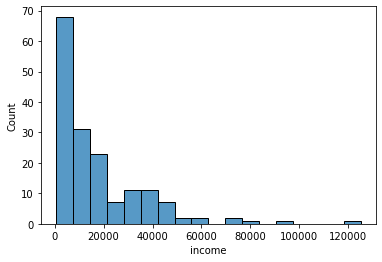

In [143]:
sns.histplot(x='income', data=df)
plt.show()

The histogram above shows the range of income based on the countries. <br>
(eg: How many countries have the income range between 20000 to 40000)

#### Histogram of gdpp based on country

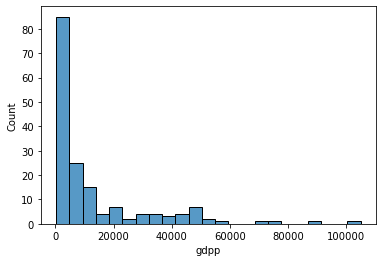

In [144]:
sns.histplot(x='gdpp', data=df)
plt.show()

The histogram above shows the range of gdpp based on the countries.<br>
(Eg: How many countries have the gdpp range between 20000 to 40000)

#### Bar Graph

Bar graph is a graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent

#### Bar graph of Top 10 for the Variables based on Country

The bar graph of top 10 of all variables are plotted based on country. These bargraphs give a clear illustrations of Top 10 country based on the country attributes such as Child Mortality Rate, Fertility Rate and Life Expectancy. The code below shows part of code to plot the bar graph.

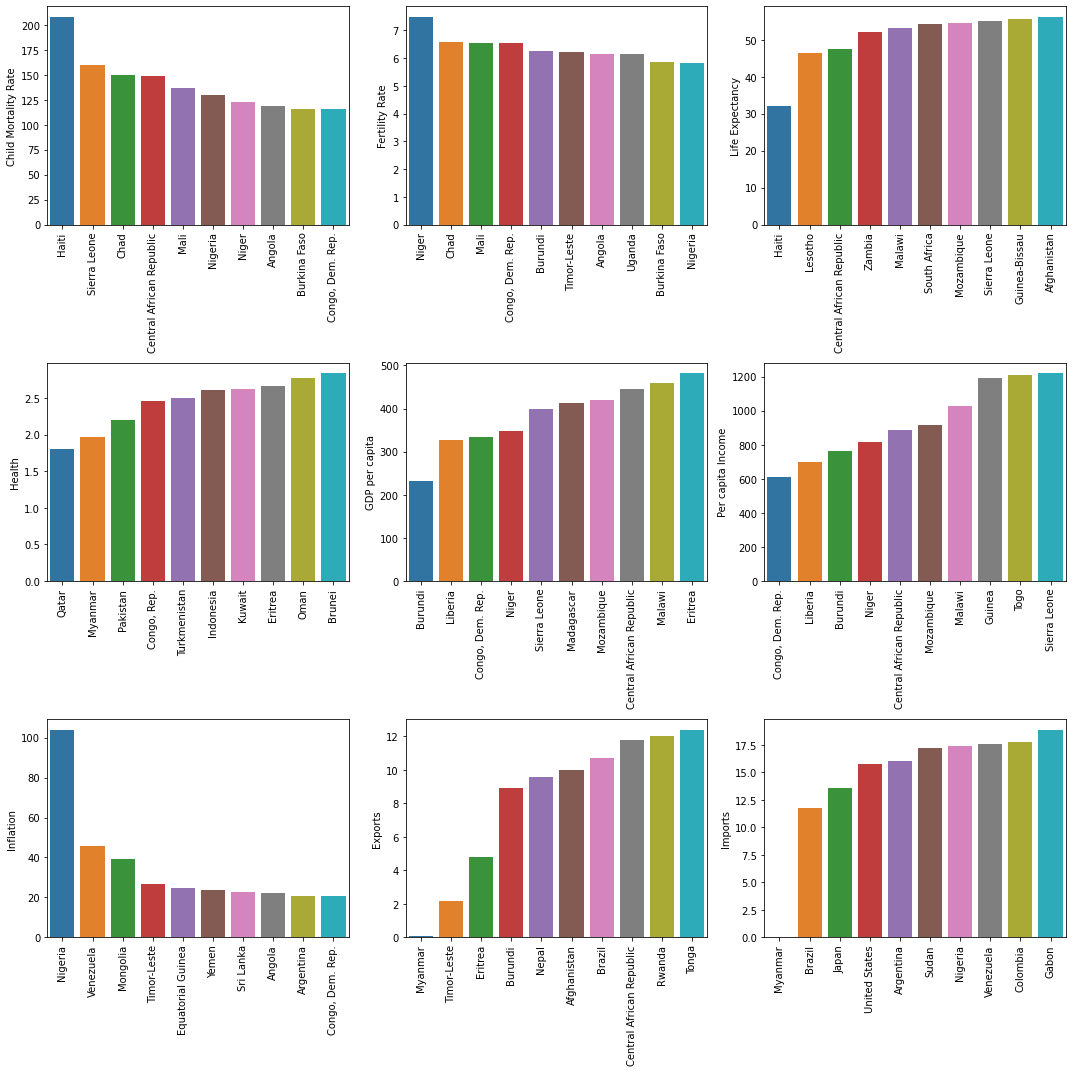

In [145]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom10_health = df[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom10_exports = df[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom10_imports = df[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

#### Scatterplot

The scatter plot which shows us the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

#### Scatterplot of country and total_fer

The scatterplot is plotted to know the estimated number of children would be born in each country if the current age-fertility rates remain the same

Text(0.5, 0, 'countries')

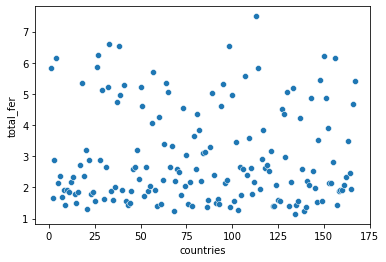

In [146]:
sns.scatterplot(data=df, x=range(1, len(df)+1), y=df['total_fer'])
plt.xlabel('countries')

Based on the scatterplot above, it shown that the data is not scattered evenly. Most of the country have the ability to born not more than 3 children based on their fertility rate.

#### Scatterplot of income and total_fer

The scatterplot is plotted to know the income and the number of estimated children to be born.

<AxesSubplot:xlabel='income', ylabel='total_fer'>

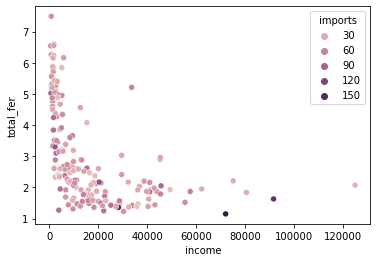

In [147]:
sns.scatterplot(data=df, x=df['income'], y=df['total_fer'], hue='imports')

There is a strong, negative, nonlinear association between the two variables(income and total_fer).

#### Scatterplot of imports and exports

The scatterplot is plotted based on the imports and exports to know the corresponding relationship of both.

(0.0, 250.0)

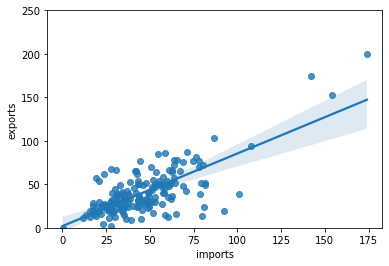

In [148]:
sns.regplot(x="imports", y="exports", data=df)
plt.ylim(0,)

#plt.ylim(bottom,top)
plt.ylim(0,250)

Based on the graph above, the imports and exports shows a linear relationship. The distirbution focuses on one part. However, there are some outliers that around 150-200.

#### Pairplot

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown below. 

#### Pairplot of all variables

By plotting a spirplot, we can get a better understanding of how the data are distributed. We can also see that some of the variables have strong linear or non-linear correlations between each other. 

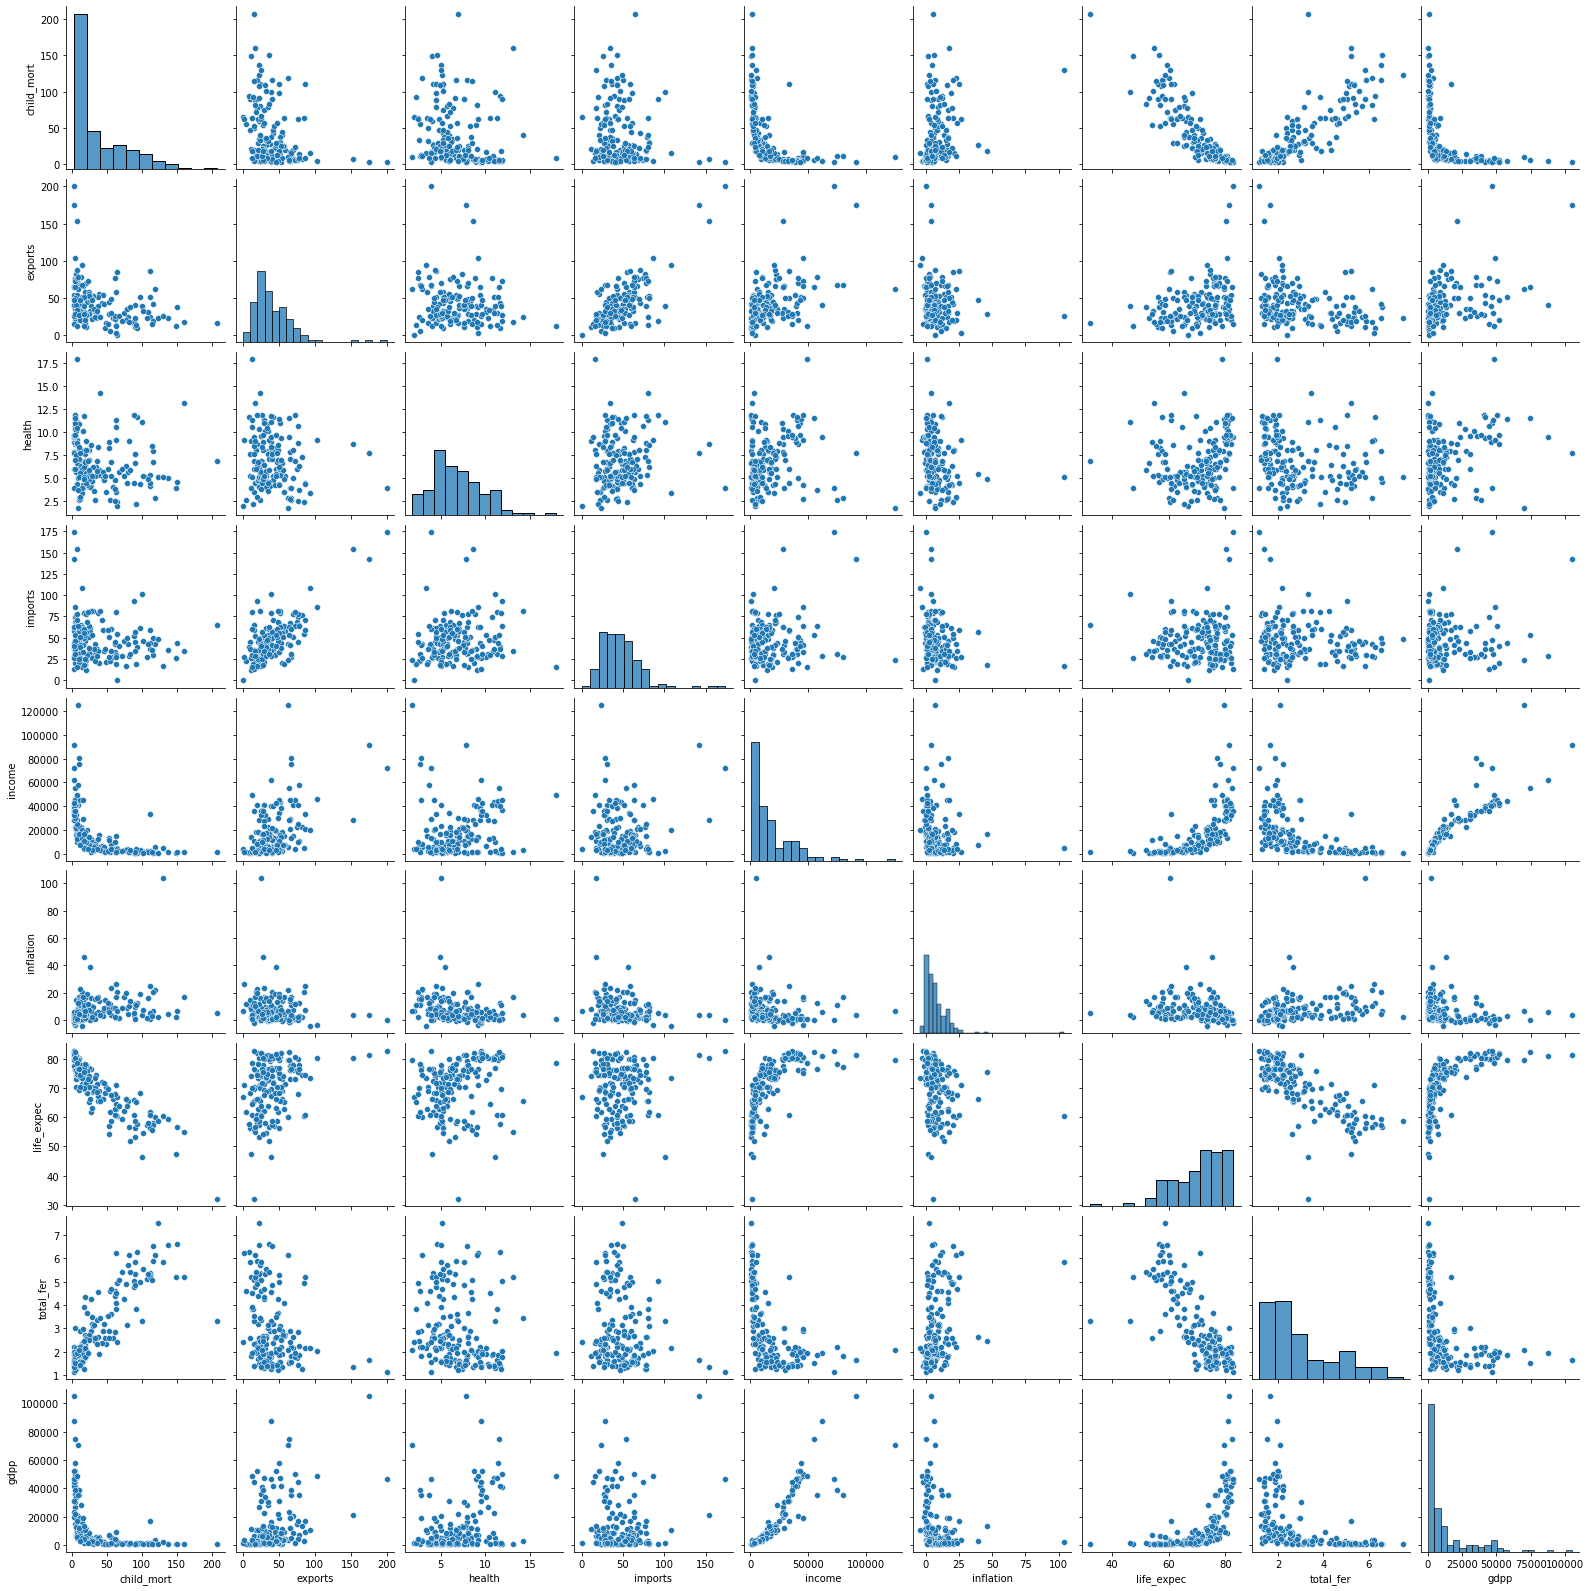

In [149]:
sns.pairplot(df, diag_kind="hist")

Based on the pairplot above, we get to the relationship based on each variables corresponding to the another variables. It shows the overview relationships of variables by plotting the historgram and scatterplot.

#### Heatmap  

Heatmap is a two-dimensional visual representation of data, where values are encoded in colors, delivering a convenient, insightful view of information. 

#### Heatmap of Country Data

The heatmap is used to illustrate the overview of country data.

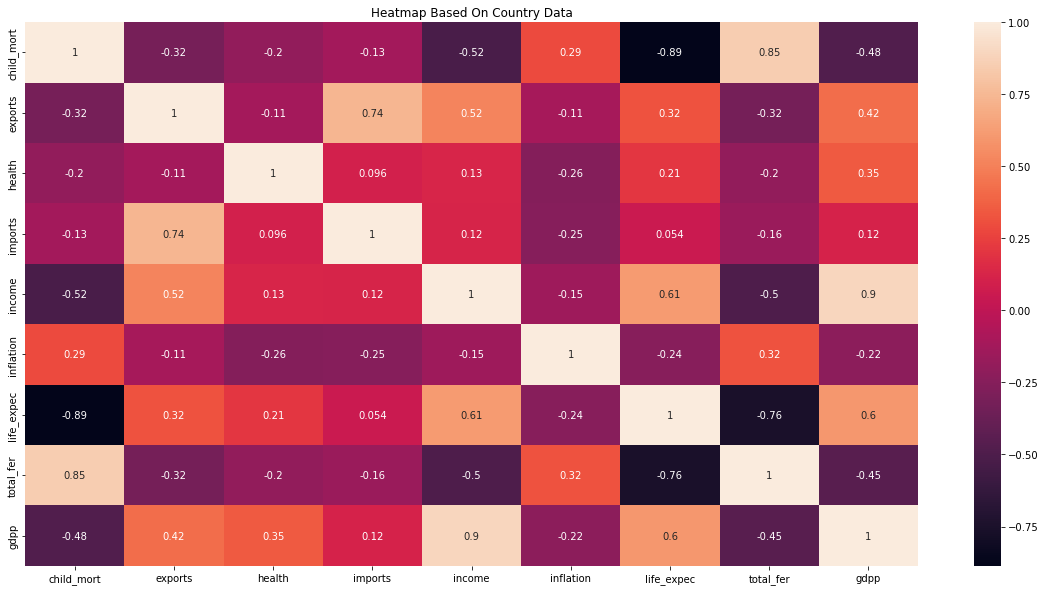

In [150]:
plt.figure(figsize = (20,10))
g = sns.heatmap(df.corr(),annot = True)
g.set(title = 'Heatmap Based On Country Data')
plt.show()

Based on the heatmap above, we can observe that exports are closely associated with imports. Gdpp is closely associated with health, exports, income, and imports.Besides that, the heat map above shows that some of the variables are strongly correlated. (Eg:income and GDP per capita,child mortality rate and life expectancy,imports and exports)

#### KDEplot

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

#### KDE graph of imports and exports

<AxesSubplot:xlabel='imports', ylabel='exports'>

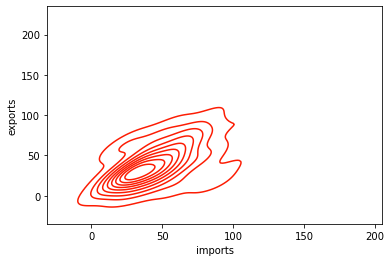

In [151]:
sns.kdeplot(data=df, x=df['imports'], y=df['exports'], color='#fc1c03')

Based on the kdeplot above, it indicates that the distribution of imports and exports and the distribution gathered between 50 to 100.

#### Boxplot

The box plot of the dataset,will show us the visual representation of how our data is scattered over the plane

#### Boxplot of All Variables

The boxplot are plotted for each variables to know how the data of each variables scattered over the plane.

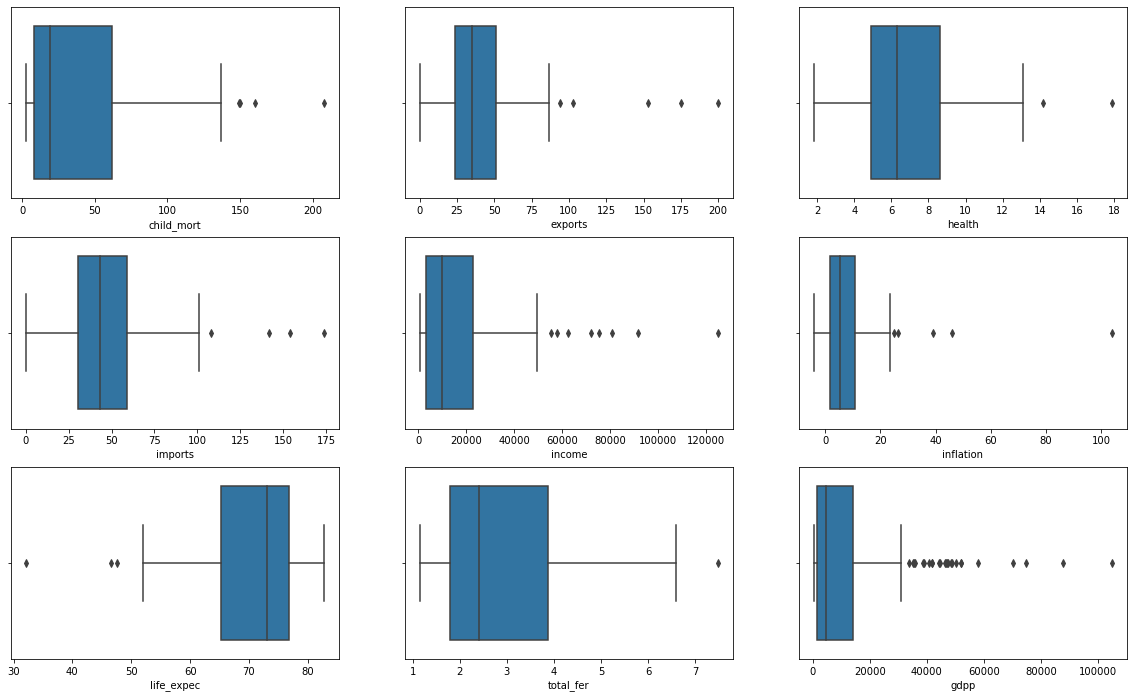

In [152]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(df.child_mort)
plt.subplot(3,3,2)
sns.boxplot(df.exports)
plt.subplot(3,3,3)
sns.boxplot(df.health)
plt.subplot(3,3,4)
sns.boxplot(df.imports)
plt.subplot(3,3,5)
sns.boxplot(df.income)
plt.subplot(3,3,6)
sns.boxplot(df.inflation)
plt.subplot(3,3,7)
sns.boxplot(df.life_expec)
plt.subplot(3,3,8)
sns.boxplot(df.total_fer)
plt.subplot(3,3,9)
sns.boxplot(df.gdpp)
plt.show()

Based on the boxplot, we can observe that gdpp has a lot of outliers.
Let's print the structure of gdpp.

#### Print the structure of gdpp

In [153]:
df.gdpp.describe()

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
max      105000.000000
Name: gdpp, dtype: float64

#### Mutiply actual value with the quantities

For the variables exports, health and imports are given as percentage of GDP. Hence, to get the actual value of these quantities multiply these columns by (GDP/100) or quantity = 0.01*percentage value *GDP

In [154]:
df['exports'] = df.exports.multiply(df.gdpp)
df['exports'] = df.exports.multiply(0.01)

df['health'] = df.health.multiply(df.gdpp)
df['health'] = df.health.multiply(0.01)

df['imports'] = df.imports.multiply(df.gdpp)
df['imports'] = df.imports.multiply(0.01)

#### Print top 5 data of country data

After multiply, let's print the head.

In [155]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Data adjustment to remove outlier

Since there are outliers of gdpp, the data adjustment is conducted to change the data of the columns as below by using the quantile and looping for the columns.

In [156]:
column = ['income', 'total_fer']

for i in column:
    q1 = df[i].quantile(0.95)
    df[i][df[i] >= q1] = q1


columns = ['imports', 'health', 'exports', 'gdpp']


for j in columns:
    q2 = df[j].quantile(0.90)
    df[j][df[j] >= q2] = q2

#### Boxplot of all variables after adjustment

Plot again the boxplot after data adjustment

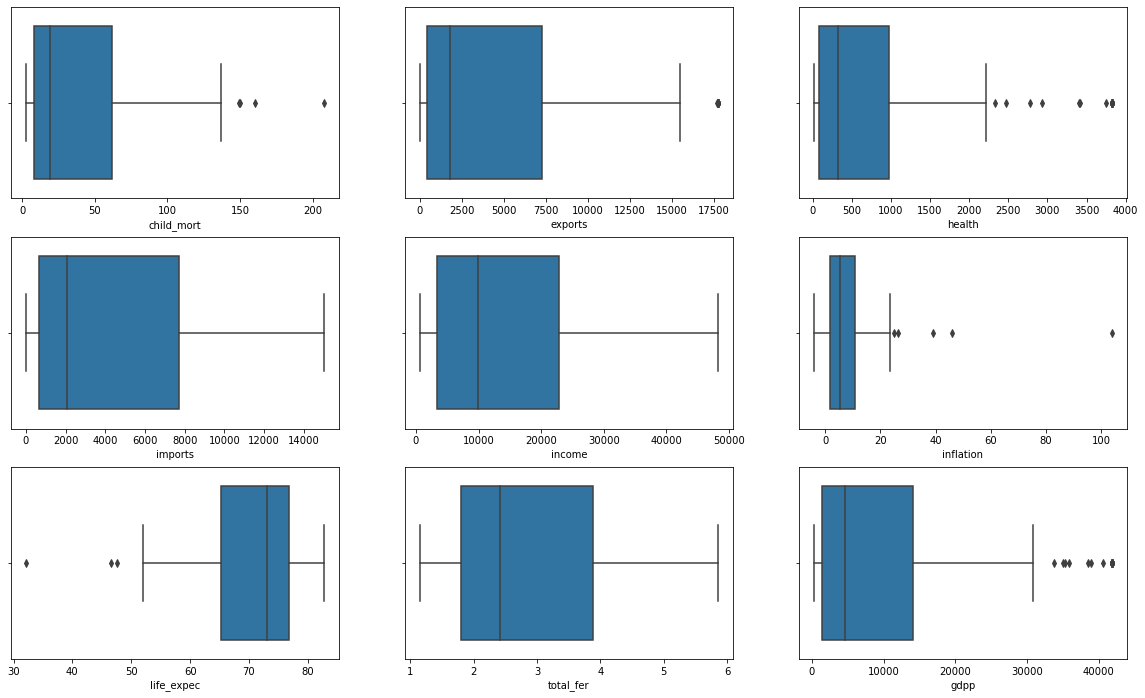

In [157]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(df.child_mort)
plt.subplot(3,3,2)
sns.boxplot(df.exports)
plt.subplot(3,3,3)
sns.boxplot(df.health)
plt.subplot(3,3,4)
sns.boxplot(df.imports)
plt.subplot(3,3,5)
sns.boxplot(df.income)
plt.subplot(3,3,6)
sns.boxplot(df.inflation)
plt.subplot(3,3,7)
sns.boxplot(df.life_expec)
plt.subplot(3,3,8)
sns.boxplot(df.total_fer)
plt.subplot(3,3,9)
sns.boxplot(df.gdpp)
plt.show()

Based on the bloxplot after adjustment, we can see that the outlier of gdpp have been changed. The outlier become lesser.

## Topic 4: Feature Selection and Scaling

#### Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model.
It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

#### Method selected for feature selection: Filtering Method (Anova Method)

ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.

The data in country dataset are continuous as we could see that like child_mort, exports,health,imports,inflation, life_expec amd total_fer. Anova is helpful for testing three or more variables and the continuous data. ANOVA groups differences by comparing the means of each group and includes spreading out the variance into diverse sources.

#### Import Libraries of Feature Selection Method

The libraries imported is used for feature selection which is SelectKBest and f_classif

In [158]:
from sklearn.feature_selection import SelectKBest, f_classif

#### Apply Anova Feature Selection Method

Apply Anova(one of the filtering methods) to filter the important and useful features for unsupervised learning

#### Define x and y

In [159]:
x= df.drop("country",axis=1)
y= df.country

f_classif is ANOVA F-value between label/feature for classification tasks.<br>
k is the number of features that to be selected from the country data.<br><br>

The k is set to 8, because the data that will be analysed in this study focuses on the quantifiable data since we want to know the socio-economy of the country. Hence, all numerical data might be useful in this study to understand well about the analysis of each country. 

In [160]:
model = SelectKBest(f_classif, k=8)
new1 = model.fit(x,y)
x_1 = new1.transform(x)
x_1.shape

(167, 8)

In [161]:
column = new1.get_support(indices=True)
features_df_new1 = x.iloc[:,column]

features_df_new1

,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553
1,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090
2,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460
3,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530
4,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200
...,...,...,...,...,...,...,...,...
162,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.500,2970
163,3847.50,662.8500,2376.000,16500.0,45.90,75.4,2.470,13500
164,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.950,1310
165,393.00,67.8580,450.640,4480.0,23.60,67.5,4.670,1310


The table above shows the selected data after implementing ANOVA filtering method. There are 8 columns after filtering. Country variable has been dropped.

#### Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

#### Method selected for feature scaling: Standard Scaler

StandardScaler scales all values between min and max so that they fall within a range from min to max. <br>
Because PCA is sensitive to the scale, if we normalized each feature by StandardScaler we can see a better result. 

#### Import libraries for Standard Scaler

In [162]:
from sklearn.preprocessing import StandardScaler

To address and minimize the extreme value issues, we need to perform some kind of scaling to the dataset. We will store the scalled dataset to a new dataframe called country_scale_df

#### Drop the country column

Since the string type cannot be converted to float, hence the country column should be dropped.

In [164]:
df = df.drop('country', axis=1)

#### Applying Standard Scaler

In [165]:
X = StandardScaler().fit_transform(np.asarray(df))

#### Print first three array

In [166]:
X[:3]

array([[ 1.29153238, -0.79728596, -0.67693345, -0.84149748, -0.95834891,
         0.15733622, -1.61909203,  2.01642065, -0.78681132],
       [-0.5389489 , -0.61163615, -0.49035208, -0.49382366, -0.3940062 ,
        -0.31234747,  0.64786643, -0.88053487, -0.53130418],
       [-0.27283273, -0.51498038, -0.55798462, -0.61121114, -0.19255214,
         0.78927429,  0.67042323, -0.01909006, -0.50457598]])

## Topic 5: Unsupervised Learning (PCA)

#### Apply PCA method for Unsupervised Learning 

Pricipal Component Analysis (PCA) is a Dimensionality Reduction technique usually used in large datasets with multiple dimensions, by transforming a large set of variables into a smaller one that still contains most of the information in the original dataset.

We start the PCA by starting an instance of it using PCA() and fit it with the scaled country data. The optimal number of Principal compenent are chosen by picking the minimum number of components that demonstrates the highest amount of variance.

#### Import libraries for PCA

In [167]:
from sklearn.decomposition import PCA

#### Initialize the parameter of PCA

n_components:The number of components must be strictly less than the minimum of n_features and n_samples.

Random State : Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used. Note that the mere presence of random_state doesn’t mean that randomization is always used, as it may be dependent on another parameter. 

In [168]:
base_model = PCA(n_components=5, random_state=42)

#### Fit the base model to features and assign into variable principal_components

In [169]:
principal_components = base_model.fit_transform(X)

#### Scatterplot for the Principal Component after fit to model

Scatterplot indicates a high dimensional data. The x label is used for representing the first principal compoent, y label is used for representing the second principal component. PCA is a good dimensional reduction technique to reduce the dataset into two dimensional.

Text(0, 0.5, 'Second Principal Component')

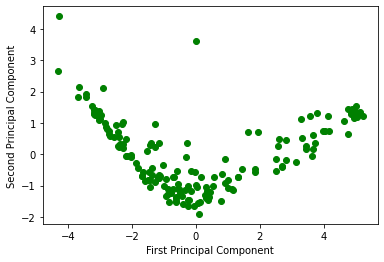

In [170]:
plt.scatter(x=principal_components[:, 0], y=principal_components[:, 1], c='g')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Based on the scatterplot above, we can the relationship between X and Y. The spread out of the scatter shows that both classes rely on each other and formed a U shape. However, there are some outliers. We can conclude that the cleaned data representation is sufficient for a classification model. 

#### Print the sum of variance ratio

The explained variance ratio is the percentage of variance that is attributed by each of the selected components.We can compare the variance in the overall dataset to what was captured from our two primary components using .explained_variance_ratio_.

In [171]:
print(base_model.explained_variance_ratio_)
evr = base_model.explained_variance_ratio_.sum()
pevr = evr*100
print("Percentage of total variance explained is" ,pevr,"%.")

[0.68786466 0.14002689 0.09808662 0.02906987 0.02248248]
Percentage of total variance explained is 97.75305200584022 %.


Explanation on the total of variance ratio:

Normally, if the percentage of total variance explained is reached 80% and above, it means that it preserves 80% information of the main dataset. In this study, the percentage of total variance explained is 97.75% indicates that it preserves around 97.75% of information from the country dataset. The dataset used has 167 data in total, it means that around 2.25% of information loss in PCA since PCA is a dimensionality reduction techniques. 

Basically, the higher the total variance explained, the lower the information loss. 97.75% for the percentage of total variance explained shows a good result and less information loss in PCA.

#### Using loop to find the best number of components for our pca model

Loop is used to find the best number of components. The variances is created to assign the loop. It will go to the columns of country data.

#### Variance

In [172]:
var = base_model.explained_variance_ratio_
print(var)

[0.68786466 0.14002689 0.09808662 0.02906987 0.02248248]


#### Cummulative Variance

The cummulative variance is the sum of all variance.

In [173]:
variances = []
[variances.append(PCA(n_components=i).fit(X).explained_variance_ratio_.sum()) for i in range(0, len(df.columns))]

[None, None, None, None, None, None, None, None, None]

#### Bargraph on Principal Component over the Explained Variance Ratio

Text(0, 0.5, 'Explained Variance Ratio')

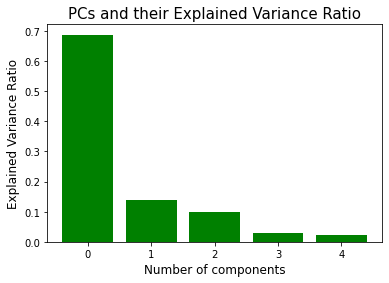

In [174]:
plt.bar([i for i, _ in enumerate(var)],var,color='green')
plt.title('PCs and their Explained Variance Ratio', fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)

Based on the bargraph, the explained variance ratio is decreasing from components to components.

#### Scree Plot on the number of components over the cumulative explained variance ratio

A scree plot is a graphical tool used in the selection of the number of relevant components or factors to be considered in a principal components analysis or a factor analysis.

In [175]:
import numpy as np
cum_var = np.cumsum(np.round(base_model.explained_variance_ratio_, decimals=4)*100)
print(cum_var)

[68.79 82.79 92.6  95.51 97.76]


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

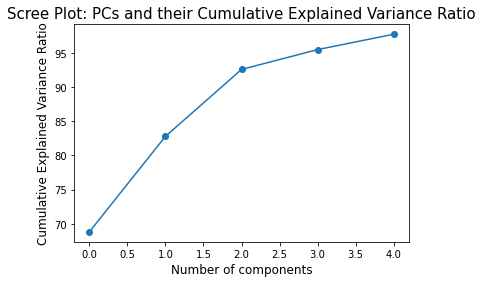

In [176]:
plt.plot(cum_var, marker='o')
plt.title('Scree Plot: PCs and their Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('Number of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)

Based on the scree plot, the graph shows a climb in a contrast with the graph above since this scree plot based on cumulative explained variance ratio.

#### Plot the line graph to observe the results of looping 

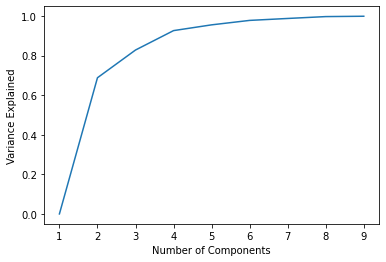

In [177]:
plt.plot(range(1, len(df.columns)+1), variances)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

Based on the line graph above, we can observe that the variance explained is increasing from component to component.

#### Add vertical line to plot by using axvline function

axvline is a function to add the vertical lines across the axes of the plot.

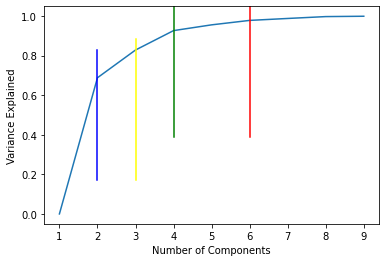

In [178]:
colors = ['g', 'r', 'b','y']
plt.plot(range(1, len(df.columns)+1), variances)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");
plt.axvline(2, .2, .8, color='blue')
plt.axvline(3, .2, .85, color='yellow')
plt.axvline(4, .4, 1., color='green')
plt.axvline(6, .4, 1., color='red')

By adding the vertical line, we can clearly see the every plots and changes of the graph.  

#### Factor Map

The factor maps allow detection of classes or groups of individuals associated with descriptors.

#### Print Data Frame of Principal Component 1 to 5

In [179]:
colnames = list(df.columns)
pca_data = pd.DataFrame({ 'Features':colnames,'PC1':base_model.components_[0],'PC2':base_model.components_[1],'PC3':base_model.components_[2],
                          'PC4':base_model.components_[3],'PC5':base_model.components_[4]})
pca_data

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.309482,0.495281,-0.208710,-0.054316,0.237653
1,exports,0.364277,0.291442,-0.010414,-0.437938,-0.243148
2,health,0.353342,0.243797,-0.111598,0.617103,0.387932
3,imports,0.375536,0.225713,-0.072858,-0.307401,-0.147534
4,income,0.377892,0.202520,0.083198,-0.154638,-0.014448
5,inflation,-0.139538,0.302417,0.927999,0.006986,0.116022
6,life_expec,0.335389,-0.339740,0.233142,0.371119,-0.460013
7,total_fer,-0.299196,0.487992,-0.123452,0.350714,-0.684061
8,gdpp,0.375989,0.270823,-0.029479,0.212739,0.137554


#### Summary on PCA 

PCA is used for the unsupervised machine learning in this study. First of all, the PCA library is imported and the parameters for PCA including n_components and random_state are initialized. The scatterplot is plotted to shows the overall of the graph based on the principal components. The n_components used in PCA is 5 because the data in our dataset is not really large. 5 is enough for machine learning purpose in this study. The base model is created to fit to the features of the data. 

Besides that, the sum of variance ratio is calculated to know the percentage of explained_variance_ratio_. By knowing the percentage of explained_variance_ratio_. , we get to know the information loss after PCA training. This study shows a very good result by reaching 94.5 % percent and only around 5% of information loss during training. 

Next, the graph visualization is significant in PCA to know well about the data training. Thus, there are a few kinds of graphs is used such as bar graph, scree plot, line graph and factor map used to implement it. Based on these graphs, we can do some analysis on it. The purpose and function of graphs are written above the graph while the explanation based on the graphs is added at the below of each graphs. The detailed explanation may refer to the section above. Lastly, a new dataframe based on principal component is printed.

## Topic 6 : Optimization

Optimization is the process where we train the model iteratively that results in a maximum and minimum function evaluation. It is one of the most important phenomena in Machine Learning to get better results.In a simple word, optimization is an effective approach to achieve a “best” solution, where a single objective is maximized or minimized.

#### Gradient Descent

Gradient descent (also known as steepest descent) is a first-order iterative optimization algorithm for locating a differentiable function's local minimum. The idea is to take repeated steps in the opposite direction of the function's gradient (or approximate gradient) at the current point, because this is the steepest descent. Stepping in the direction of the gradient, on the other hand, will result in a local maximum of that function; this procedure is known as gradient ascent. The technqiue used for optimization is Gradient Descent.

#### Assign Features Variables

In [180]:
X = df['total_fer']

# Assign response variable to y
y = df['health']

#### Visualise the relationship between the total_fer and the health using scatterplots

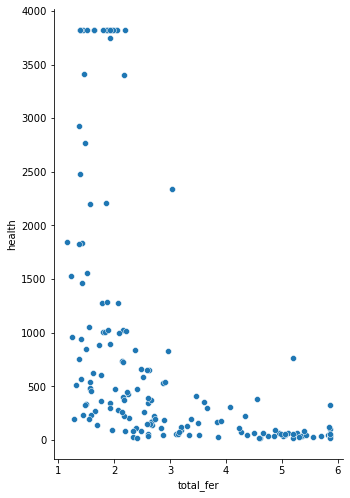

In [181]:
sns.pairplot(df, x_vars='total_fer', y_vars='health',size=7, aspect=0.7, kind='scatter')

#### Convert X and y variables as numpy arrays

In [182]:
X = np.array(X)
y = np.array(y)

#### Implement gradient descent function

In [185]:
# Takes in X, y, current m and c (both initialised to 0), num_iterations, learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X, y, m_current=0, c_current=0, iters=2000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)

#### Print gradients at multiple (m, c) pairs

In [186]:
# notice that gradient decreased gradually towards 0

gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,33.264625,17.235676,2.209550e+06
1,58.482314,32.185662,2.084543e+06
2,77.489760,45.365207,2.007754e+06
3,91.704812,57.172084,1.959715e+06
4,102.221986,67.913381,1.928825e+06
...,...,...,...
1995,-410.323228,2058.637518,1.117356e+06
1996,-410.324663,2058.642632,1.117356e+06
1997,-410.326092,2058.647728,1.117356e+06
1998,-410.327516,2058.652805,1.117356e+06


#### Plotting cost against number of iterations

<AxesSubplot:xlabel='index'>

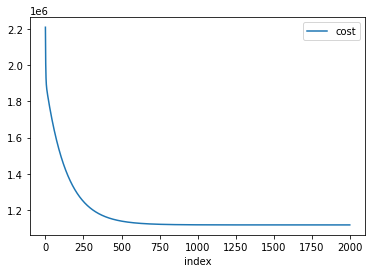

In [188]:
gradients.reset_index().plot.line(x='index', y=['cost'])

In a nutshell, there is a significant relationship between health and total_fer. The gradient descent conducted in this study went through 2000 iterations with 0.01 learning rate.The smaller learning rate the longer Gradient Descent converges, or may reach maximum iteration before reaching the optimum point. If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely. Thus, a learning rate with 0.01 is fine for conduct Gradient Descent Optimization to reach an optimum point. 

After that, the training started to train the data. The x-axis indicates the number of iterations while the y-axis indicates cost. Gradient Descent will apply the formula to find a local minimum point.

## Topic 7 : Conclusion

In a nutshell, we used the Country Data dataset with the unsupervised learning technique PCA. From the dataset, we must identify which countries require assistance by categorising them based on socioeconomic and health factors that influence the country's overall development. After importing the data, we performed pre-analytics with Exploratory Data Analysis (EDA). The dataset contains no null values or fraud data. 

Following that is the data exploration and visualisation topic, in which the data will be visually implemented using various graphs to extract the dataset data. For example, we can learn about each country's income level, child mortality rate, fertility rate, and life expectancy. We can also predict what each data set will produce when combined, such as the estimated number of children born with their current age-fertility rates. As a result, we can examine all of the graphs and draw conclusions about which countries require the most assistance. 

Following that, we must perform feature selection and scaling to reduce the number of input variables when developing a predictive model with ANOVA. Because the string type cannot be converted to float, we had to remove the country column.
 
For our unsupervised learning technique, we then used the PCA method. We can determine the information loss following PCA training by knowing the percentage of explained variance ratio_. This study achieves a very good result of 97.75 percent and only about 2% information loss during training. 

Finally, we can get the "best" solution by training the model iteratively. This part was a little more difficult because getting a code for it was more difficult, and we had to do trial and error over and over again, but we eventually got the solution. Suggestions for future work include ensuring that all data can be changed to float so that no columns are deleted.
<br><br>
-Refer to the project report for briefly explanation-